In [8]:
from pydsstools.heclib.dss import HecDss
from pydsstools.core import TimeSeriesContainer
import pandas as pd
import numpy as np
import glob

In [2]:
# for each dss file, get precip-inc at a location
dss_dir = r"Z:\LWI\EJPM-OS-Param-Rainfall-Tests\hms_out_dss\2004_Matthew"
dss_files = glob.glob(dss_dir+"//*.dss")
dss_files = sorted(dss_files)

hms_element = 'Amite'
parameter = 'PRECIP-INC'

In [ ]:
fid.close()

In [3]:
fid = HecDss.Open(r"Z:\LWI\EJPM-OS-Param-Rainfall-Tests\hms_out_dss\2004_Matthew\TS_Matthew_JPM_Sim1.dss")

In [4]:
pathname_pattern = f'//{hms_element}/{parameter}/*/1HOUR/*/'
path_list = fid.getPathnameList(pathname_pattern,sort=1)

In [5]:
subbasinList = []
DSSpaths_List = []
for path in path_list:
    pathSplit = path.split("/")
    subbasin = pathSplit[2]
    cPart = pathSplit[3]
    ePart = pathSplit[5]
    fPart = pathSplit[6]
    subbasinList.append(subbasin)
    # Remove d-part
    noDpartPath = f"//{subbasin}/{cPart}//{ePart}/{fPart}/"
    DSSpaths_List.append(noDpartPath)
    

# sort the lists alphabetically, and remove dups
subbasinList = sorted(list(set(subbasinList)))
DSSpaths_List = sorted(list(set(DSSpaths_List)))

DSSpaths_List

['//AMITE/PRECIP-INC//1HOUR/MET:TS_MATTHEW_JPM_SIM1/']

In [6]:
ts = fid.read_ts(DSSpaths_List[0])

In [ ]:
df_multi = pd.DataFrame() 

In [19]:

df = pd.DataFrame()


df['Times'] = df.append(ts.pytimes)
df['Values'] = df.append(ts.values)
df['Missing'] = df.append(ts.nodata)
df.Values = np.where(df.Missing == True, np.NaN, df.Values)
df['sim'] = df.append('sim1')

df
# df_multi.concat(df, ignore_index=True)
# df_multi

KeyError: 'Times'

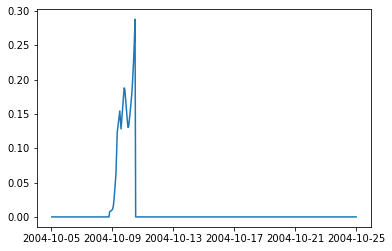

In [12]:
import matplotlib.pyplot as plt
plt.plot(df.Times,df.Values)

In [ ]:
for dss_file in dss_files[0:1]:
    print (dss_file)
    # with HecDss.Open(dss_file) as fid:
    #     print (fid)
    fid = HecDss.Open(dss_file)

In [ ]:
for dss_file in dss_files[0:1]:
    sim = dss_file.split(".")[0].split("_")[-1]
    pathname_pattern = '//AMITE/PRECIP-INC/*/1HOUR/*/'
    # pathname = f'//AMITE/PRECIP-INC/*/1HOUR/MET:HURRICANE_MATTHEW_JPM_{sim}/'
    with HecDss.Open(dss_file) as fid:
        # ts = fid.read_ts(pathname)
        path_list = fid.getPathnameList(pathname_pattern,sort=1)